<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [2]:
!pip install pandas
!pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Import pandas module


In [3]:
import pandas as pd


Import matplotlib


In [4]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [5]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [6]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [7]:
## Write your code here
#### Task 1: Identify Duplicate Rows
# Identify duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]
#1. Count the number of duplicate rows in the dataset.
num_duplicates = duplicate_rows.shape[0]
#3. Display the first few duplicate rows to understand their structure.
print(f"Number of duplicate rows: {num_duplicates}")
print("First few duplicate rows:")
print(duplicate_rows.head())


Number of duplicate rows: 20
First few duplicate rows:
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to open

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [8]:
## Write your code here
# Task 2: Analyze Characteristics of Duplicates
#1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
# Identify duplicate rows based on selected columns
duplicate_subset = df[df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'])]
#2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
duplicate_subset_counts = duplicate_subset[['MainBranch', 'Employment', 'RemoteWork']].value_counts()
#3. Display the counts of these duplicate rows to understand the frequency of identical values in these columns.
print("Counts of duplicate rows based on selected columns:")
print(duplicate_subset_counts)

   


Counts of duplicate rows based on selected columns:
MainBranch                                                Employment                                                                                                       RemoteWork                          
I am a developer by profession                            Employed, full-time                                                                                              Hybrid (some remote, some in-person)    15287
                                                                                                                                                                           Remote                                  12195
                                                                                                                                                                           In-person                                7117
                                                          Independent contractor, freelan

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


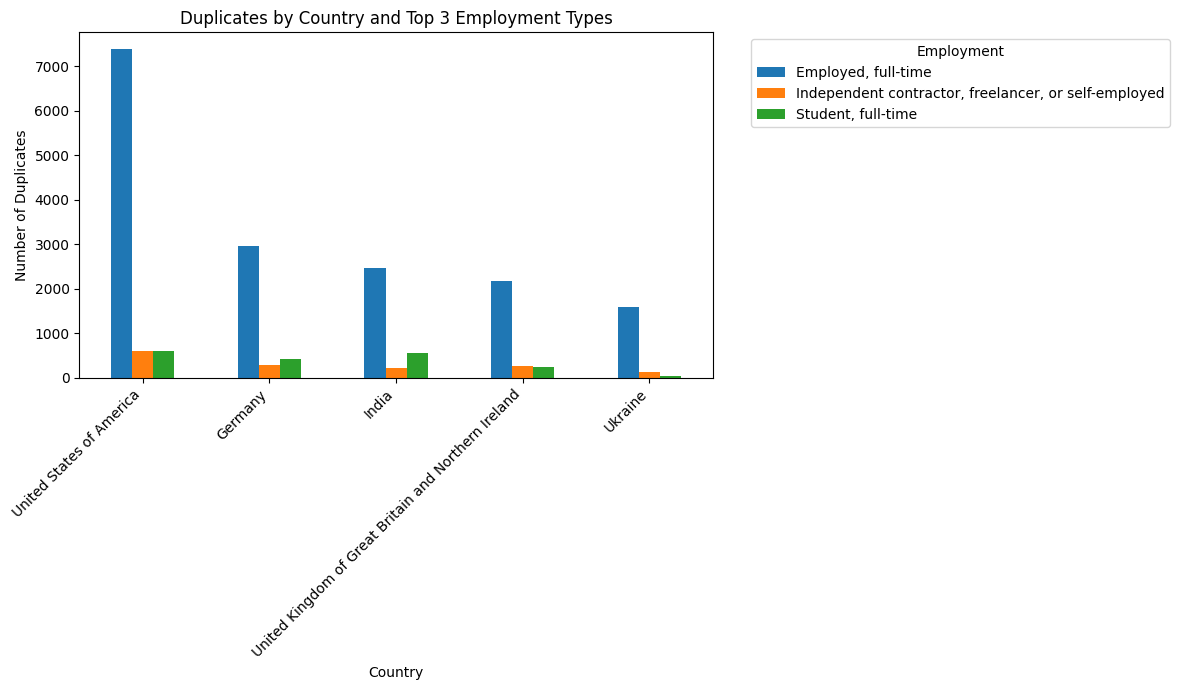

In [12]:
# Get top 5 countries and top 3 employment types among duplicates
top_countries = df['Country'].value_counts().head(5).index
top_employment = df['Employment'].value_counts().head(3).index

# Filter duplicates for these categories
duplicates = df[df.duplicated(subset=['Country', 'Employment'], keep=False)]
filtered = duplicates[
    (duplicates['Country'].isin(top_countries)) &
    (duplicates['Employment'].isin(top_employment))
]

# Prepare data for grouped bar chart
grouped = (
    filtered.groupby(['Country', 'Employment'])
    .size()
    .unstack(fill_value=0)
    .reindex(index=top_countries, columns=top_employment)
)

# Plot grouped bar chart
grouped.plot(kind='bar', figsize=(12, 7))
plt.title('Duplicates by Country and Top 3 Employment Types')
plt.xlabel('Country')
plt.ylabel('Number of Duplicates')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Big Honk\AppData\Local\Temp\ipykernel_22892\710773280.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Country_Employment'] = filtered['Country'] + ' - ' + filtered['Employment']
C:\Users\Big Honk\AppData\Local\Temp\ipykernel_22892\710773280.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


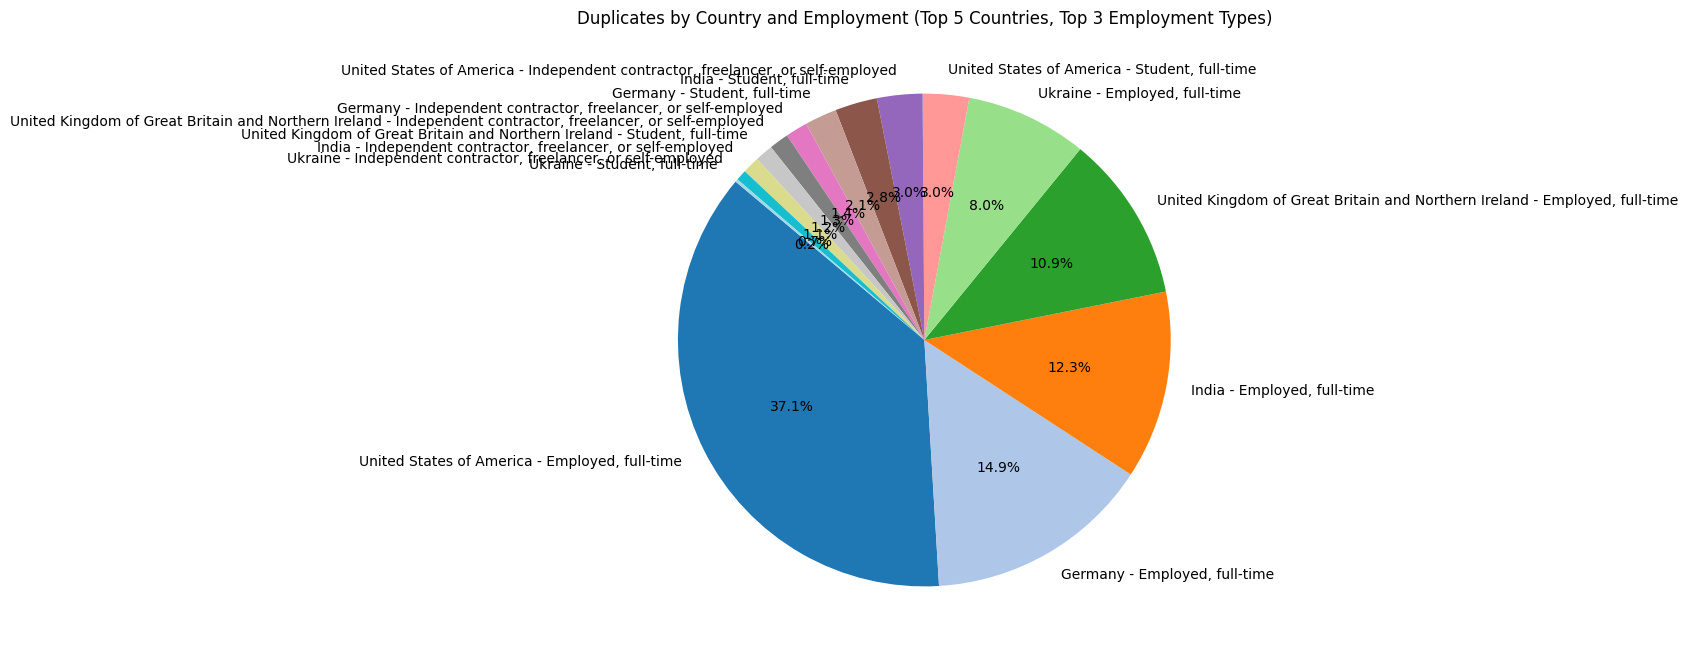

In [13]:
# Pie chart of duplicates by Country and Employment (top 5 countries and top 3 employment types)

# Select top 5 countries and top 3 employment types among duplicates
top_countries = df['Country'].value_counts().head(5).index
top_employment = df['Employment'].value_counts().head(3).index

# Filter duplicates for these categories
duplicates = df[df.duplicated(subset=['Country', 'Employment'], keep=False)]
filtered = duplicates[
    (duplicates['Country'].isin(top_countries)) &
    (duplicates['Employment'].isin(top_employment))
]

# Create a combined label for pie chart
filtered['Country_Employment'] = filtered['Country'] + ' - ' + filtered['Employment']

# Count occurrences for each combination
pie_counts = filtered['Country_Employment'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
pie_counts.plot.pie(autopct='%1.1f%%', startangle=140, cmap='tab20')
plt.title('Duplicates by Country and Employment (Top 5 Countries, Top 3 Employment Types)')
plt.ylabel('')
plt.tight_layout()
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [16]:
#'MainBranch', 'Employment', and 'RemoteWork' are critical for uniqueness.
unique_columns = ['MainBranch', 'Employment', 'RemoteWork']

# 2. Remove duplicates based on these columns, keeping the first occurrence.
df_no_duplicates = df.drop_duplicates(subset=unique_columns, keep='first')

# Display the number of rows before and after duplicate removal
print(f"Rows before duplicate removal: {df.shape[0]}")
print(f"Rows after duplicate removal: {df_no_duplicates.shape[0]}")


Rows before duplicate removal: 65457
Rows after duplicate removal: 561


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
